## Spectral function plots

In ``spectral_fun.py``, I have code that calculates spectral functions and makes various plots. This one plots the spectral function at various values of $k$ for a fixed $G$. Input the requested parameters. Here, I'm importing code to find the spectral function using all eigenstates or lanczos methods.

In [1]:
from spectral_fun import find_spectral_fun, find_degenerate_spectral_fun, lanczos_akw
from exact_diag import ham_op, ham_op_2, form_basis
import numpy as np
import matplotlib.pyplot as plt

params = {'text.usetex' : True,
          # 'font.family' : 'serif',
          'font.serif' : 'STIX',
          'mathtext.fontset' : 'stix',
          'text.latex.preamble' : [r'\usepackage{amsmath}', r'\usepackage{amssymb}']
          }
plt.rcParams.update(params) 

40
40


/Users/wholdhus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/wholdhus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0, 0.5, '$\\Delta_{ij}$')

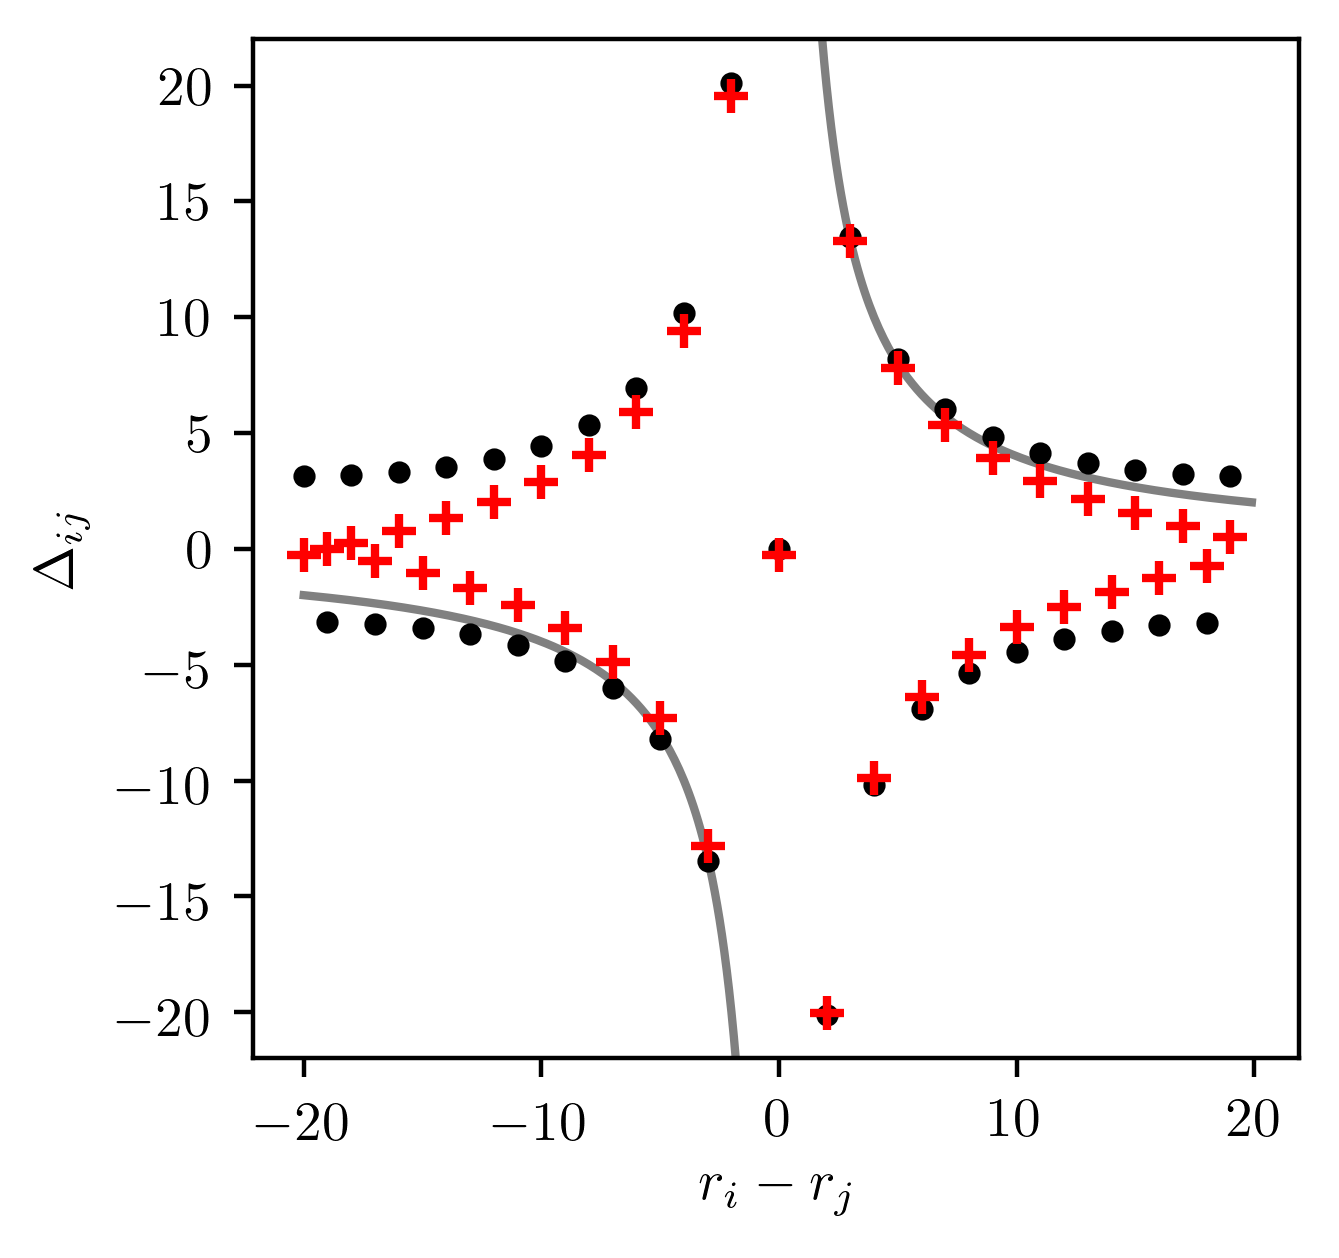

In [2]:
plt.figure(figsize=(3.375, 3.375), dpi=400)
L = 20
ks_anti = np.arange(-2*L+1, 2*L+1, 2)*0.5*np.pi/L
ks_peri = np.arange(-2*L, 2*L, 2)*0.5*np.pi/L
print(len(ks_anti))
print(len(ks_peri))
eta = np.sin(0.5*ks_anti)

moms = [ks_anti, ks_peri ] #, eta]
opts = [ks_anti, ks_peri ] #, ks_anti]
colors = ['black', 'red', 'pink']
markers = ['.', '+', r'$\bigcirc$']
plt.plot(np.arange(0, L, .1), 2*L/np.arange(0, L, .1), color='gray', zorder=1)
plt.plot(np.arange(-L, -.1, .1), 2*L/np.arange(-L, -.1, .1), color='gray', zorder=1)
for oi, o in enumerate(opts):
    mom = moms[oi]
    d0is = np.zeros(2*L)
    for i in range(2*L):
        li = L-i
        s1 = np.sum(o*np.exp(-1j*mom*1))
        d0is[i] = np.sum(s1*o*np.exp(-1j*mom*li))
    plt.scatter(np.arange(-L, L), d0is/(2*L), color=colors[oi], marker = markers[oi], zorder = oi+2)
plt.ylim(-1.1*L, 1.1*L)
plt.xlabel(r'$r_i - r_j$')
plt.ylabel(r'$\Delta_{ij}$')
# plt.savefig('/Users/wholdhus/Desktop/SO5_Figs/pairing_coeffs', bbox_inches='tight', transparent=False)

In [3]:
L = 4
N = 12
ks = np.arange(1, 2*L+1, 2)*0.5*np.pi/L
G = -1/np.sum(ks)

steps = 1000
eta = .1
# eta = 1./steps
kf = L + N//4
# kf = None
order = 100

print('Full Ham')
couplings=(1,1,1)
ap_d, am_d, omegas_d, ns = find_spectral_fun(L, N, G, ks, steps=steps, k=kf, n_states=-999,
                                       eta=eta, couplings=couplings, subtract_ef=True)
print('Pairing')
couplings=(1,0,0)
ap_pair, am_pair, omegas_pair, ns = find_spectral_fun(L, N, G, ks, steps=steps, k=kf, n_states=-999,
                                       eta=eta, couplings=couplings, subtract_ef=True)
print('Heisenberg')
couplings=(0,1,0)
ap_spin, am_spin, omegas_spin, ns = find_spectral_fun(L, N, G, ks, steps=steps, k=kf, n_states=-999,
                                       eta=eta, couplings=couplings,
                                       subtract_ef=True)
print('Attr. heisenberg')
couplings=(0,-1,0)
ap_spina, am_spina, omegas_spina, ns = find_spectral_fun(L, N, G, ks, steps=steps, k=kf, n_states=-999,
                                       eta=eta, couplings=couplings,
                                       subtract_ef=True)
print('DenDen')
couplings=(0,0,1)
ap_dd, am_dd, omegas_dd, ns = find_spectral_fun(L, N, G, ks, steps=steps, k=kf, n_states=-999,
                                       eta=eta, couplings=couplings,
                                       subtract_ef=True)
print('Attr. DenDen')
couplings=(0,0,-1)
ap_dda, am_dda, omegas_dda, ns = find_spectral_fun(L, N, G, ks, steps=steps, k=kf, n_states=-999,
                                       eta=eta, couplings=couplings,
                                       subtract_ef=True)
print('Mod')
ap_ns, am_ns, omegas_ns, ns = find_spectral_fun(L, N, G, ks, steps=steps, k=kf, n_states=-999,
                                               eta=eta, couplings=(1,1,1),
                                               subtract_ef=True, exactly_solvable=False)

Full Ham
[0.39269908 1.17809725 1.96349541 2.74889357]
Creating at 7th spot


100%|██████████| 1568/1568 [00:01<00:00, 870.14it/s] 


4 nonzero creation elements
20 nonzero annihilation elements
Pairing
[0.39269908 1.17809725 1.96349541 2.74889357]


  0%|          | 0/1568 [00:00<?, ?it/s]

Creating at 7th spot


100%|██████████| 1568/1568 [00:01<00:00, 997.29it/s]


4 nonzero creation elements
21 nonzero annihilation elements
Heisenberg
[0.39269908 1.17809725 1.96349541 2.74889357]


  0%|          | 0/1568 [00:00<?, ?it/s]

Creating at 7th spot


100%|██████████| 1568/1568 [00:01<00:00, 1464.86it/s]


1 nonzero creation elements
0 nonzero annihilation elements
Attr. heisenberg
[0.39269908 1.17809725 1.96349541 2.74889357]


  0%|          | 0/1568 [00:00<?, ?it/s]

Creating at 7th spot


100%|██████████| 1568/1568 [00:01<00:00, 1024.43it/s]


1 nonzero creation elements
1 nonzero annihilation elements
DenDen
[0.39269908 1.17809725 1.96349541 2.74889357]


/Users/wholdhus/Desktop/repos/so5-richardson-gaudin/exact_diag.py:31: RuntimeWarning: invalid value encountered in true_divide
  return v_out/np.linalg.norm(v_out)
  0%|          | 0/1568 [00:00<?, ?it/s]

Creating at 7th spot


100%|██████████| 1568/1568 [00:01<00:00, 1130.41it/s]


1 nonzero creation elements
0 nonzero annihilation elements
Attr. DenDen
[0.39269908 1.17809725 1.96349541 2.74889357]


/Users/wholdhus/Desktop/repos/so5-richardson-gaudin/exact_diag.py:31: RuntimeWarning: invalid value encountered in true_divide
  return v_out/np.linalg.norm(v_out)
  0%|          | 0/1568 [00:00<?, ?it/s]

Creating at 7th spot


100%|██████████| 1568/1568 [00:01<00:00, 1186.04it/s]


0 nonzero creation elements
1 nonzero annihilation elements
Mod
[0.39269908 1.17809725 1.96349541 2.74889357]


  0%|          | 0/1568 [00:00<?, ?it/s]

Creating at 7th spot


100%|██████████| 1568/1568 [00:01<00:00, 1209.49it/s]


7 nonzero creation elements
41 nonzero annihilation elements


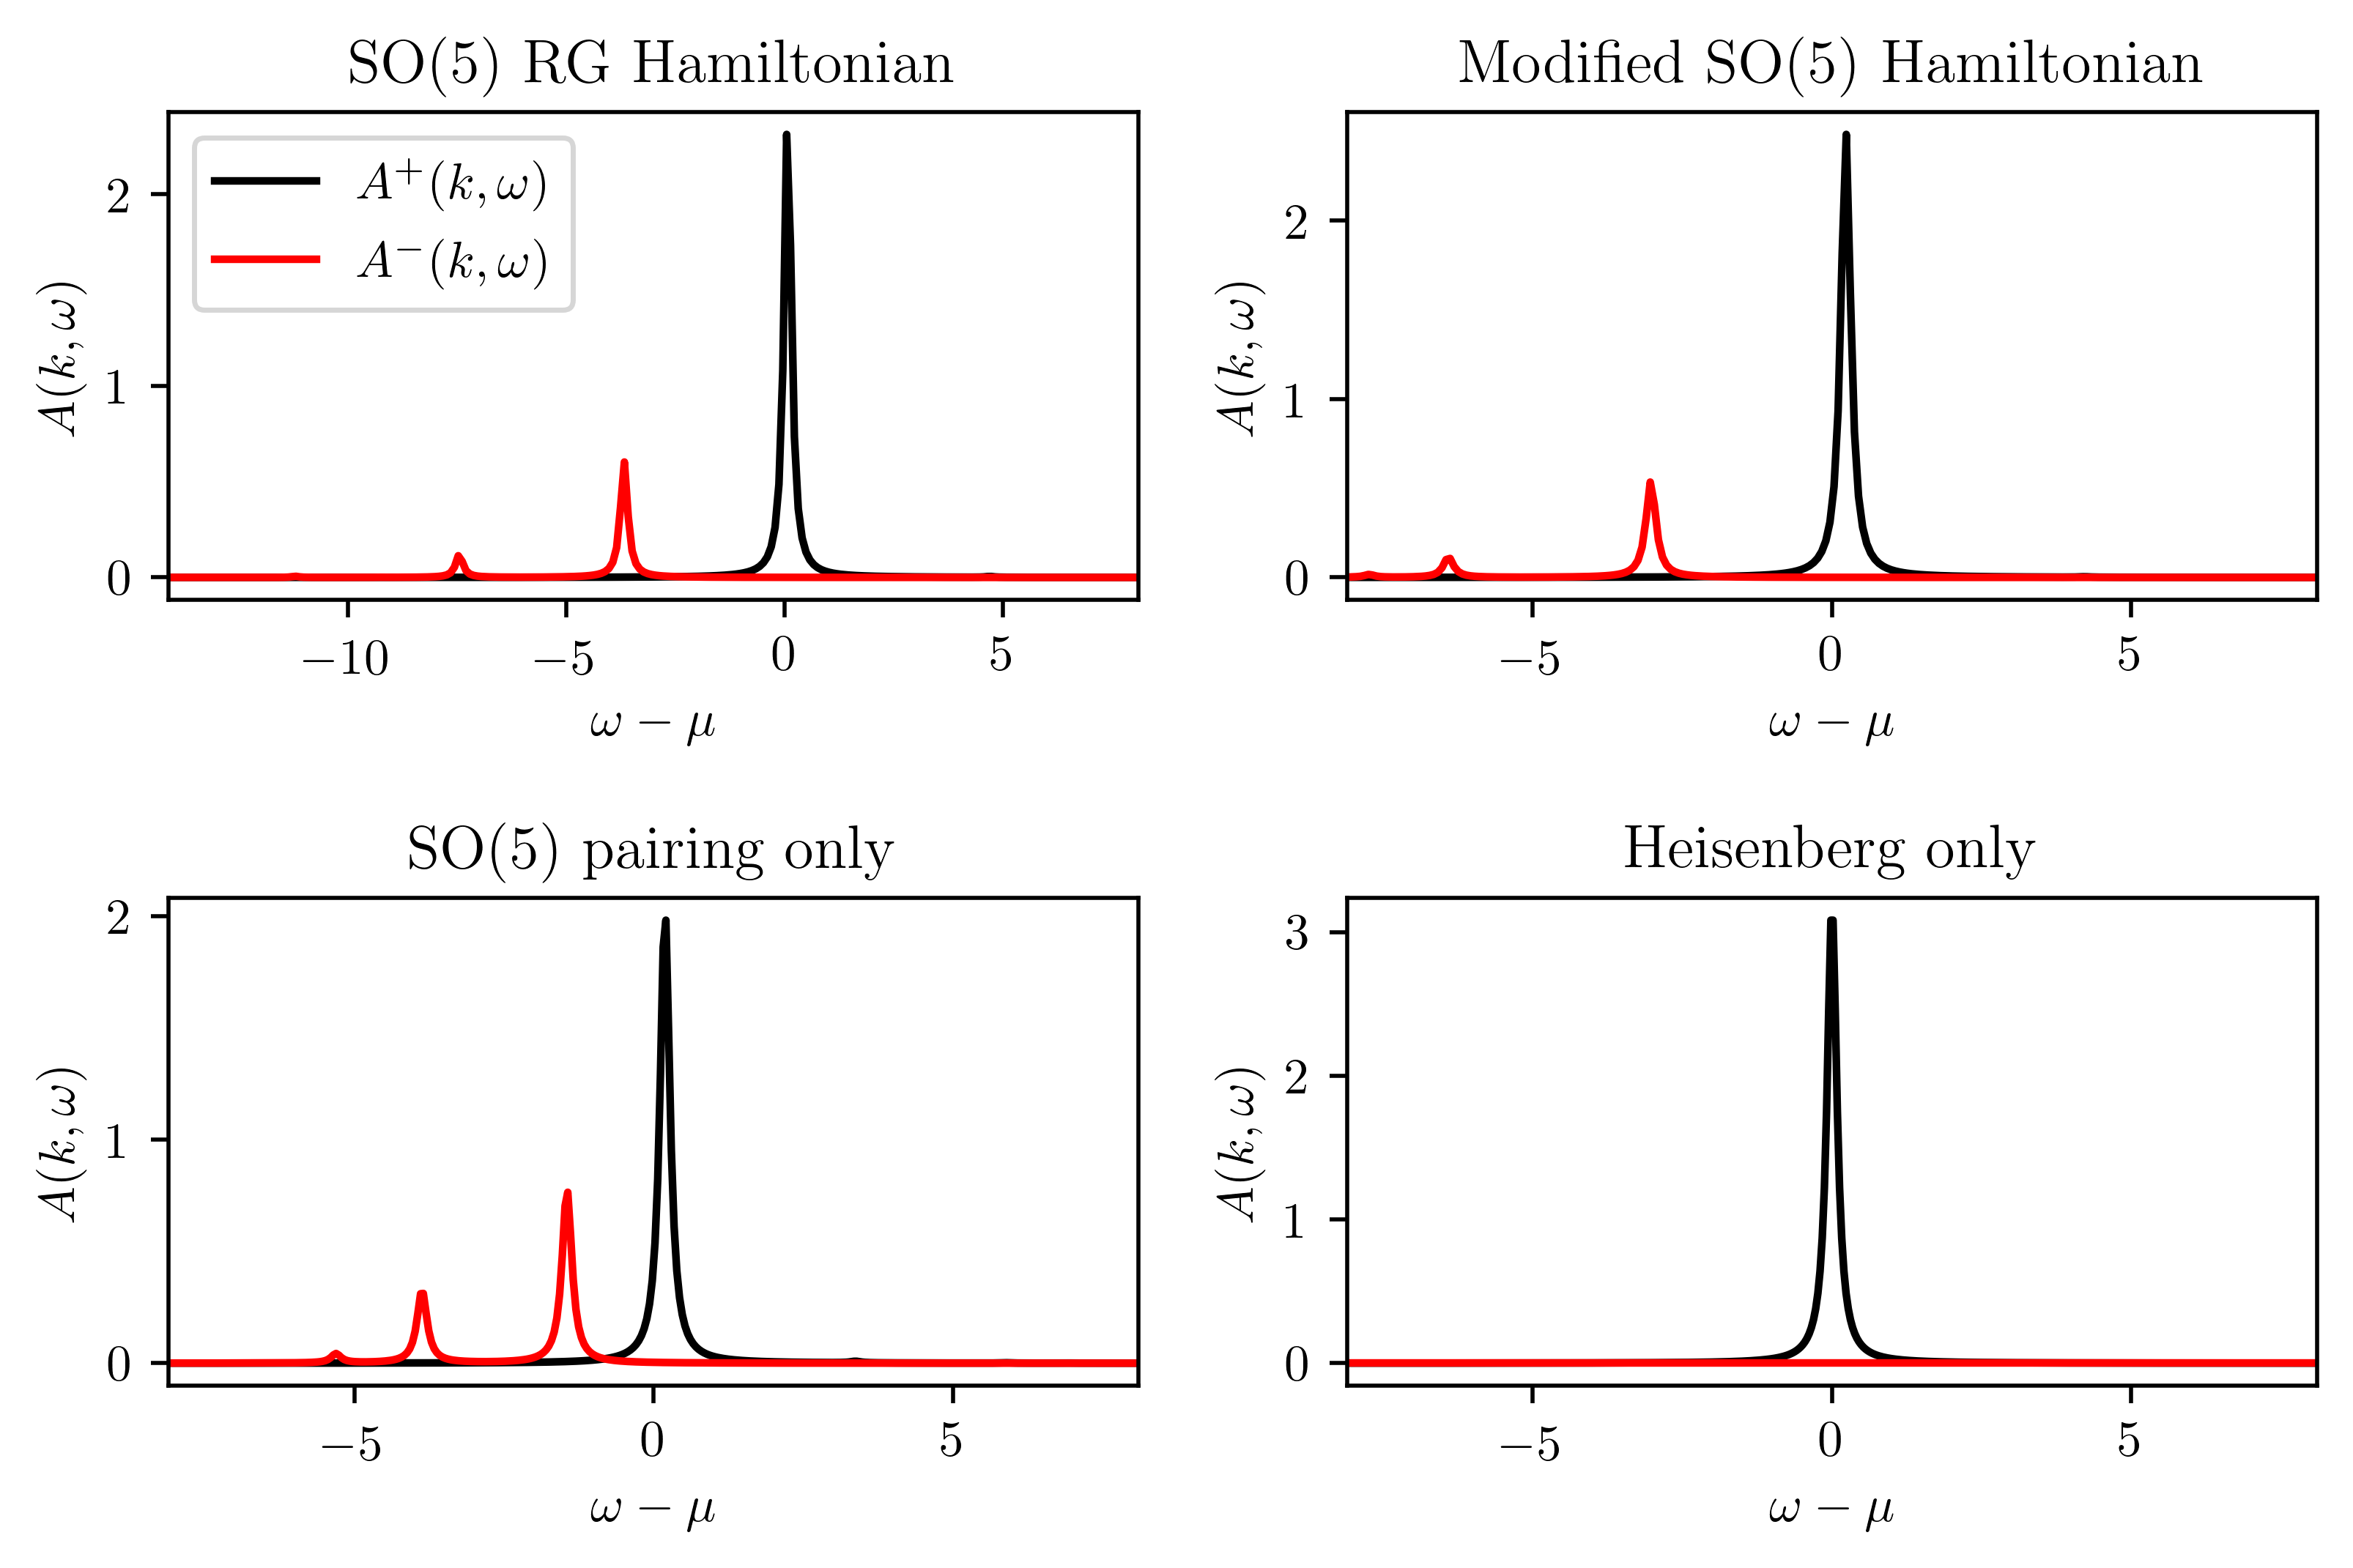

In [4]:
params = {'text.usetex' : True,
          # 'font.family' : 'serif',
          'font.serif' : 'STIX',
          'mathtext.fontset' : 'stix',
          'font.family' : 'STIXGeneral'
          # 'text.latex.preamble' : [r'\usepackage{amsmath}', r'\usepackage{amssymb}']
          }
plt.rcParams.update(params) 

plt.figure(figsize=(6.75, 4.5), dpi=500)

plt.subplot(2,2,1)
plt.plot(omegas_d, ap_d, ls='-', color='black', label = r'$A^+(k,\omega)$')
plt.plot(omegas_d, am_d, ls='-', color='red', label = r'$A^-(k,\omega)$')
plt.xlim(-14.1, 8.1)
# plt.ylim(-0.1, 1.6)
plt.xlabel(r'$\omega-\mu$')
plt.ylabel(r'$A(k,\omega)$')
plt.title(r'SO(5) RG Hamiltonian')
plt.legend()

plt.subplot(2,2,2)
plt.plot(omegas_ns, ap_ns, ls='-', color='black')
plt.plot(omegas_ns, am_ns, ls='-', color='red')
plt.xlim(-8.1, 8.1)
# plt.ylim(-0.1, 1.6)
plt.xlabel(r'$\omega-\mu$')
plt.ylabel(r'$A(k,\omega)$')
plt.title(r'Modified SO(5) Hamiltonian')

plt.subplot(2,2,3)
plt.plot(omegas_pair, ap_pair, ls='-', color='black')
plt.plot(omegas_pair, am_pair, ls='-', color='red')
plt.xlim(-8.1, 8.1)
# plt.ylim(-0.1, 1.6)
plt.xlabel(r'$\omega-\mu$')
plt.ylabel(r'$A(k,\omega)$')
plt.title(r'SO(5) pairing only')


plt.subplot(2,2,4)
plt.plot(omegas_spin, ap_spin, ls='-', color='black', label = r'$A^+(k_F,\omega)$')
plt.plot(omegas_spin, am_spin, ls='-', color='red', label = r'$A^-(k_F,\omega)$')
plt.xlim(-8.1, 8.1)
# plt.ylim(-0.1, 1.6)
plt.xlabel(r'$\omega-\mu$')
plt.ylabel(r'$A(k,\omega)$')
plt.title(r'Heisenberg only')




plt.tight_layout(pad=1.5)
# plt.savefig('/Users/wholdhus/Desktop/SO5_Figs/spectral_functions.pdf', bbox_inches='tight', transparent=False)

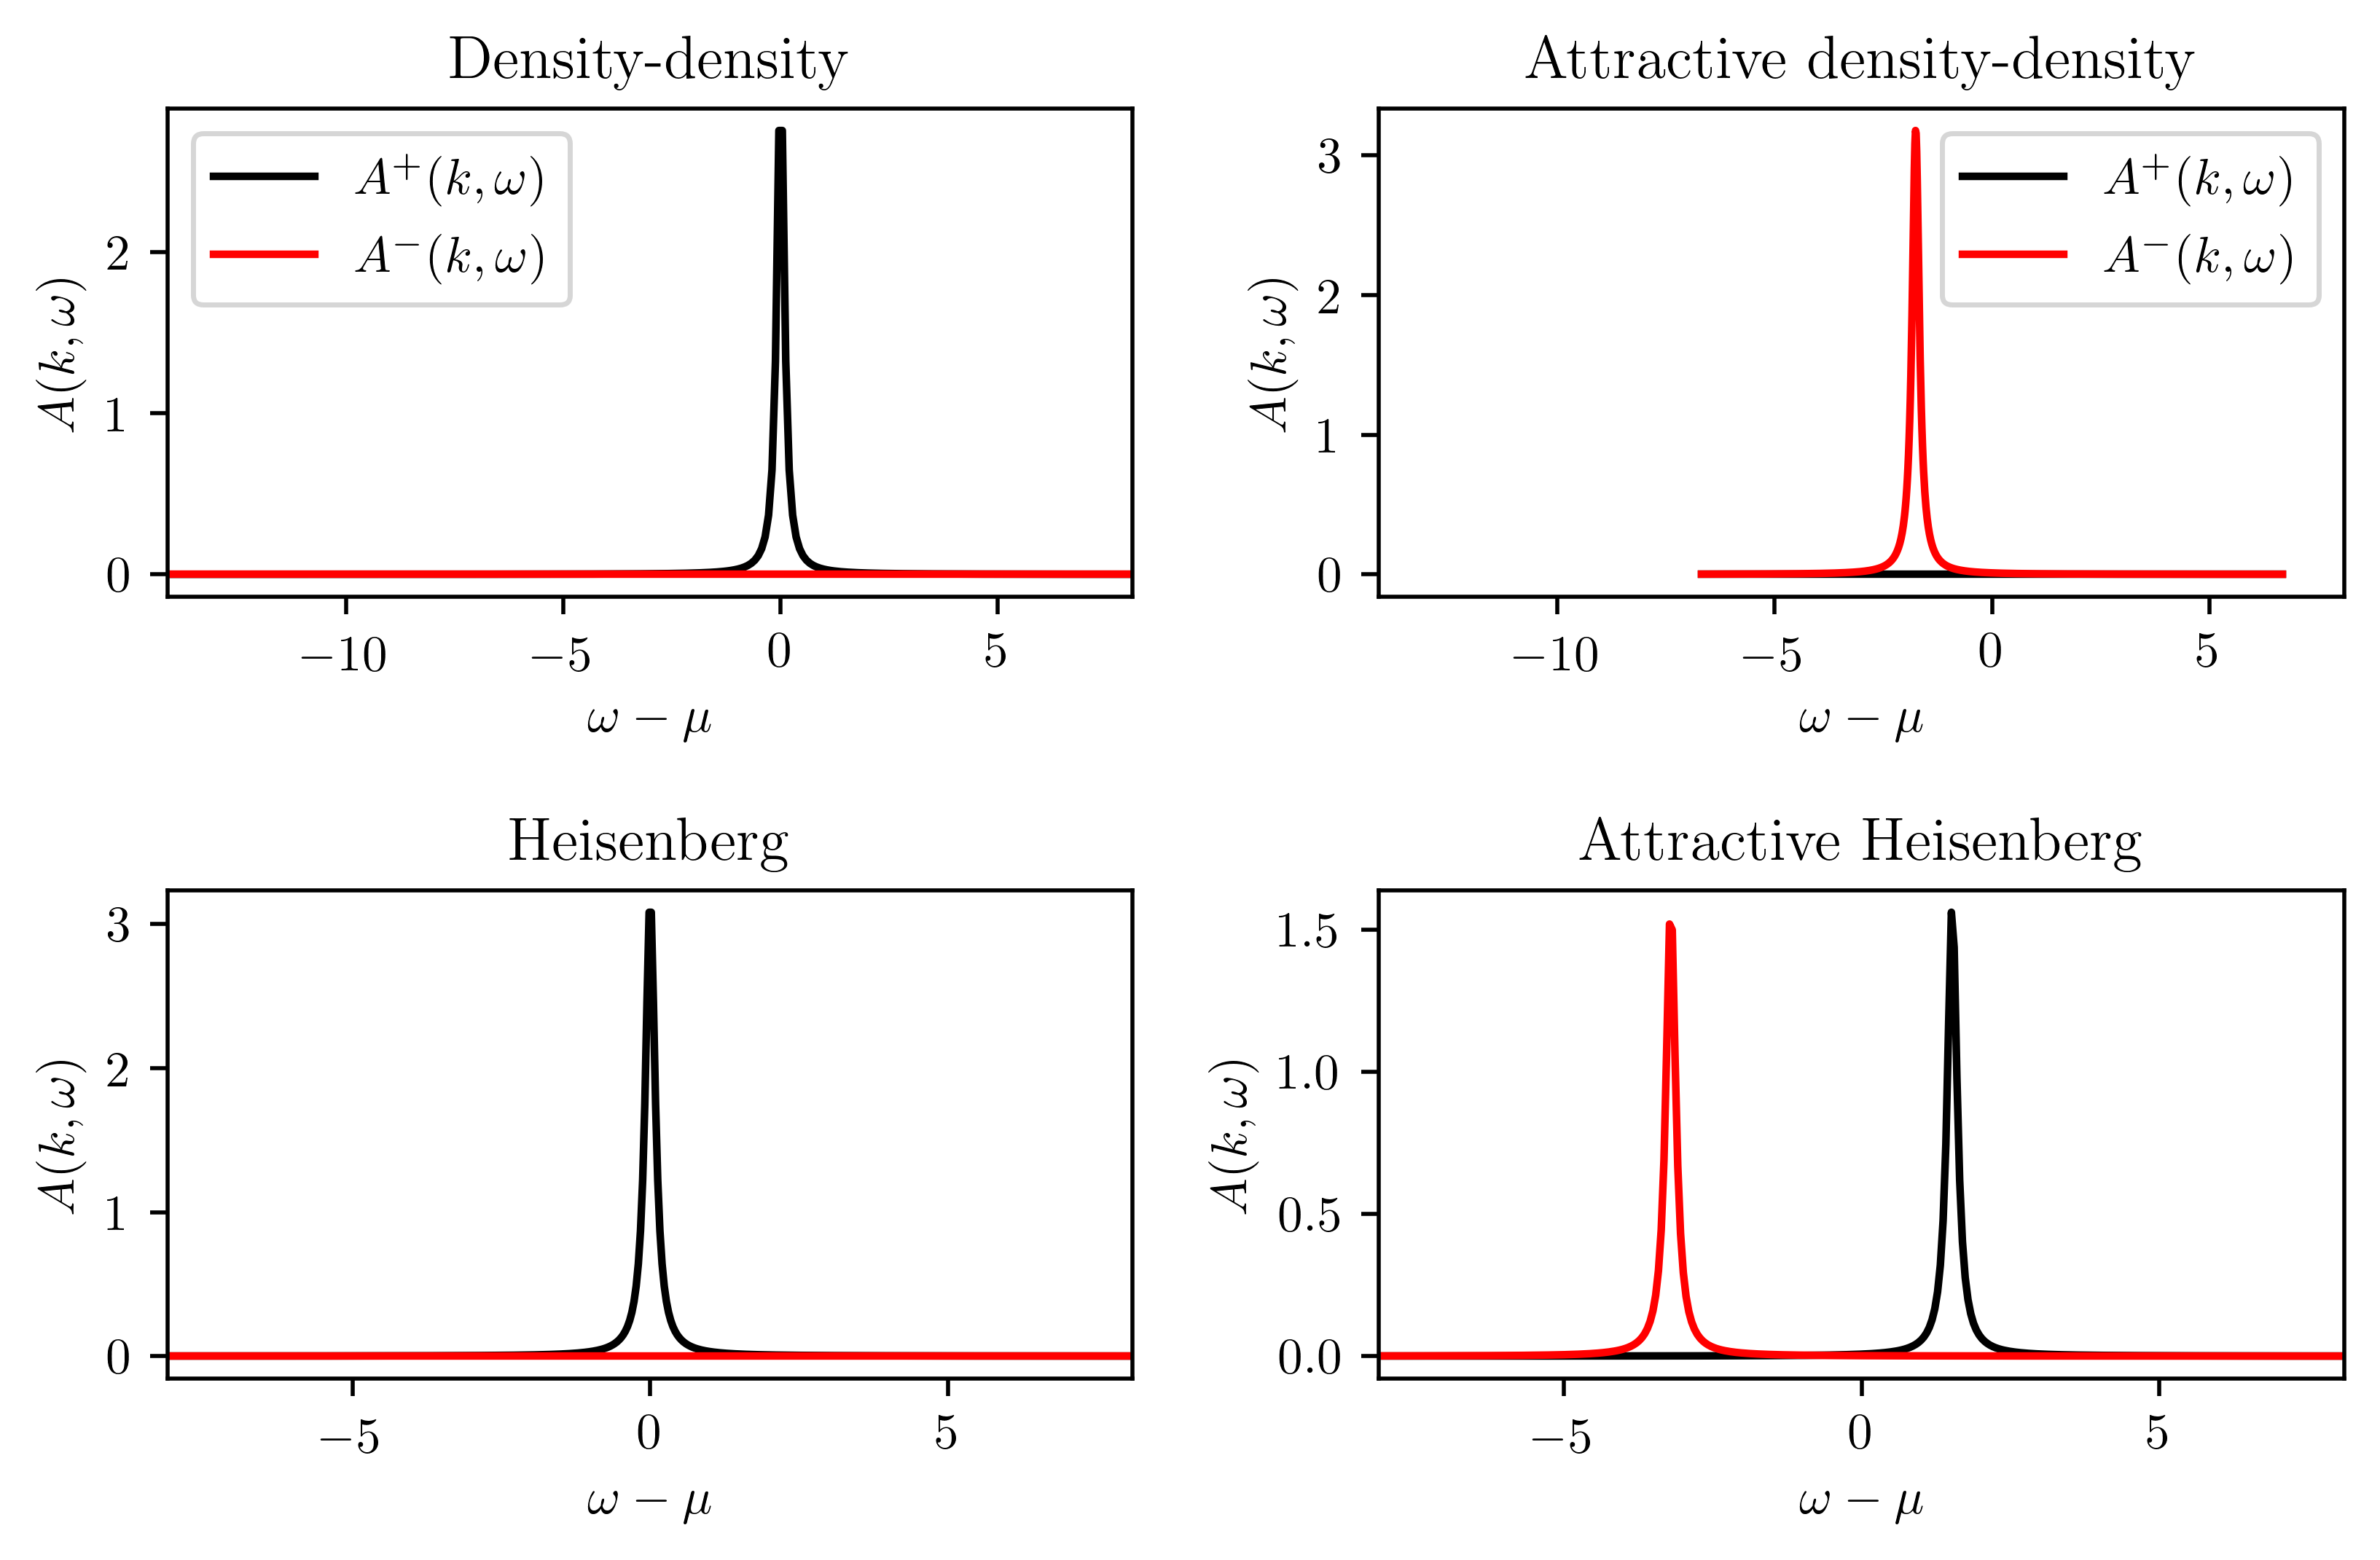

In [5]:
plt.figure(figsize=(6.75, 4.5), dpi=500)

plt.subplot(2,2,1)
plt.plot(omegas_dd, ap_dd, ls='-', color='black', label = r'$A^+(k,\omega)$')
plt.plot(omegas_dd, am_dd, ls='-', color='red', label = r'$A^-(k,\omega)$')
plt.xlim(-14.1, 8.1)
# plt.ylim(-0.1, 1.6)
plt.xlabel(r'$\omega-\mu$')
plt.ylabel(r'$A(k,\omega)$')
plt.title(r'Density-density')
plt.legend()

plt.subplot(2,2,2)
plt.plot(omegas_dda, ap_dda, ls='-', color='black', label = r'$A^+(k,\omega)$')
plt.plot(omegas_dda, am_dda, ls='-', color='red', label = r'$A^-(k,\omega)$')
plt.xlim(-14.1, 8.1)
# plt.ylim(-0.1, 1.6)
plt.xlabel(r'$\omega-\mu$')
plt.ylabel(r'$A(k,\omega)$')
plt.title(r'Attractive density-density')
plt.legend()

plt.subplot(2,2,3)
plt.plot(omegas_spin, ap_spin, ls='-', color='black')
plt.plot(omegas_spin, am_spin, ls='-', color='red')
plt.xlim(-8.1, 8.1)
# plt.ylim(-0.1, 1.6)
plt.xlabel(r'$\omega-\mu$')
plt.ylabel(r'$A(k,\omega)$')
plt.title(r'Heisenberg')

plt.subplot(2,2,4)
plt.plot(omegas_spina, ap_spina, ls='-', color='black')
plt.plot(omegas_spina, am_spina, ls='-', color='red')
plt.xlim(-8.1, 8.1)
# plt.ylim(-0.1, 1.6)
plt.xlabel(r'$\omega-\mu$')
plt.ylabel(r'$A(k,\omega)$')
plt.title(r'Attractive Heisenberg')

plt.tight_layout(pad=1.5)


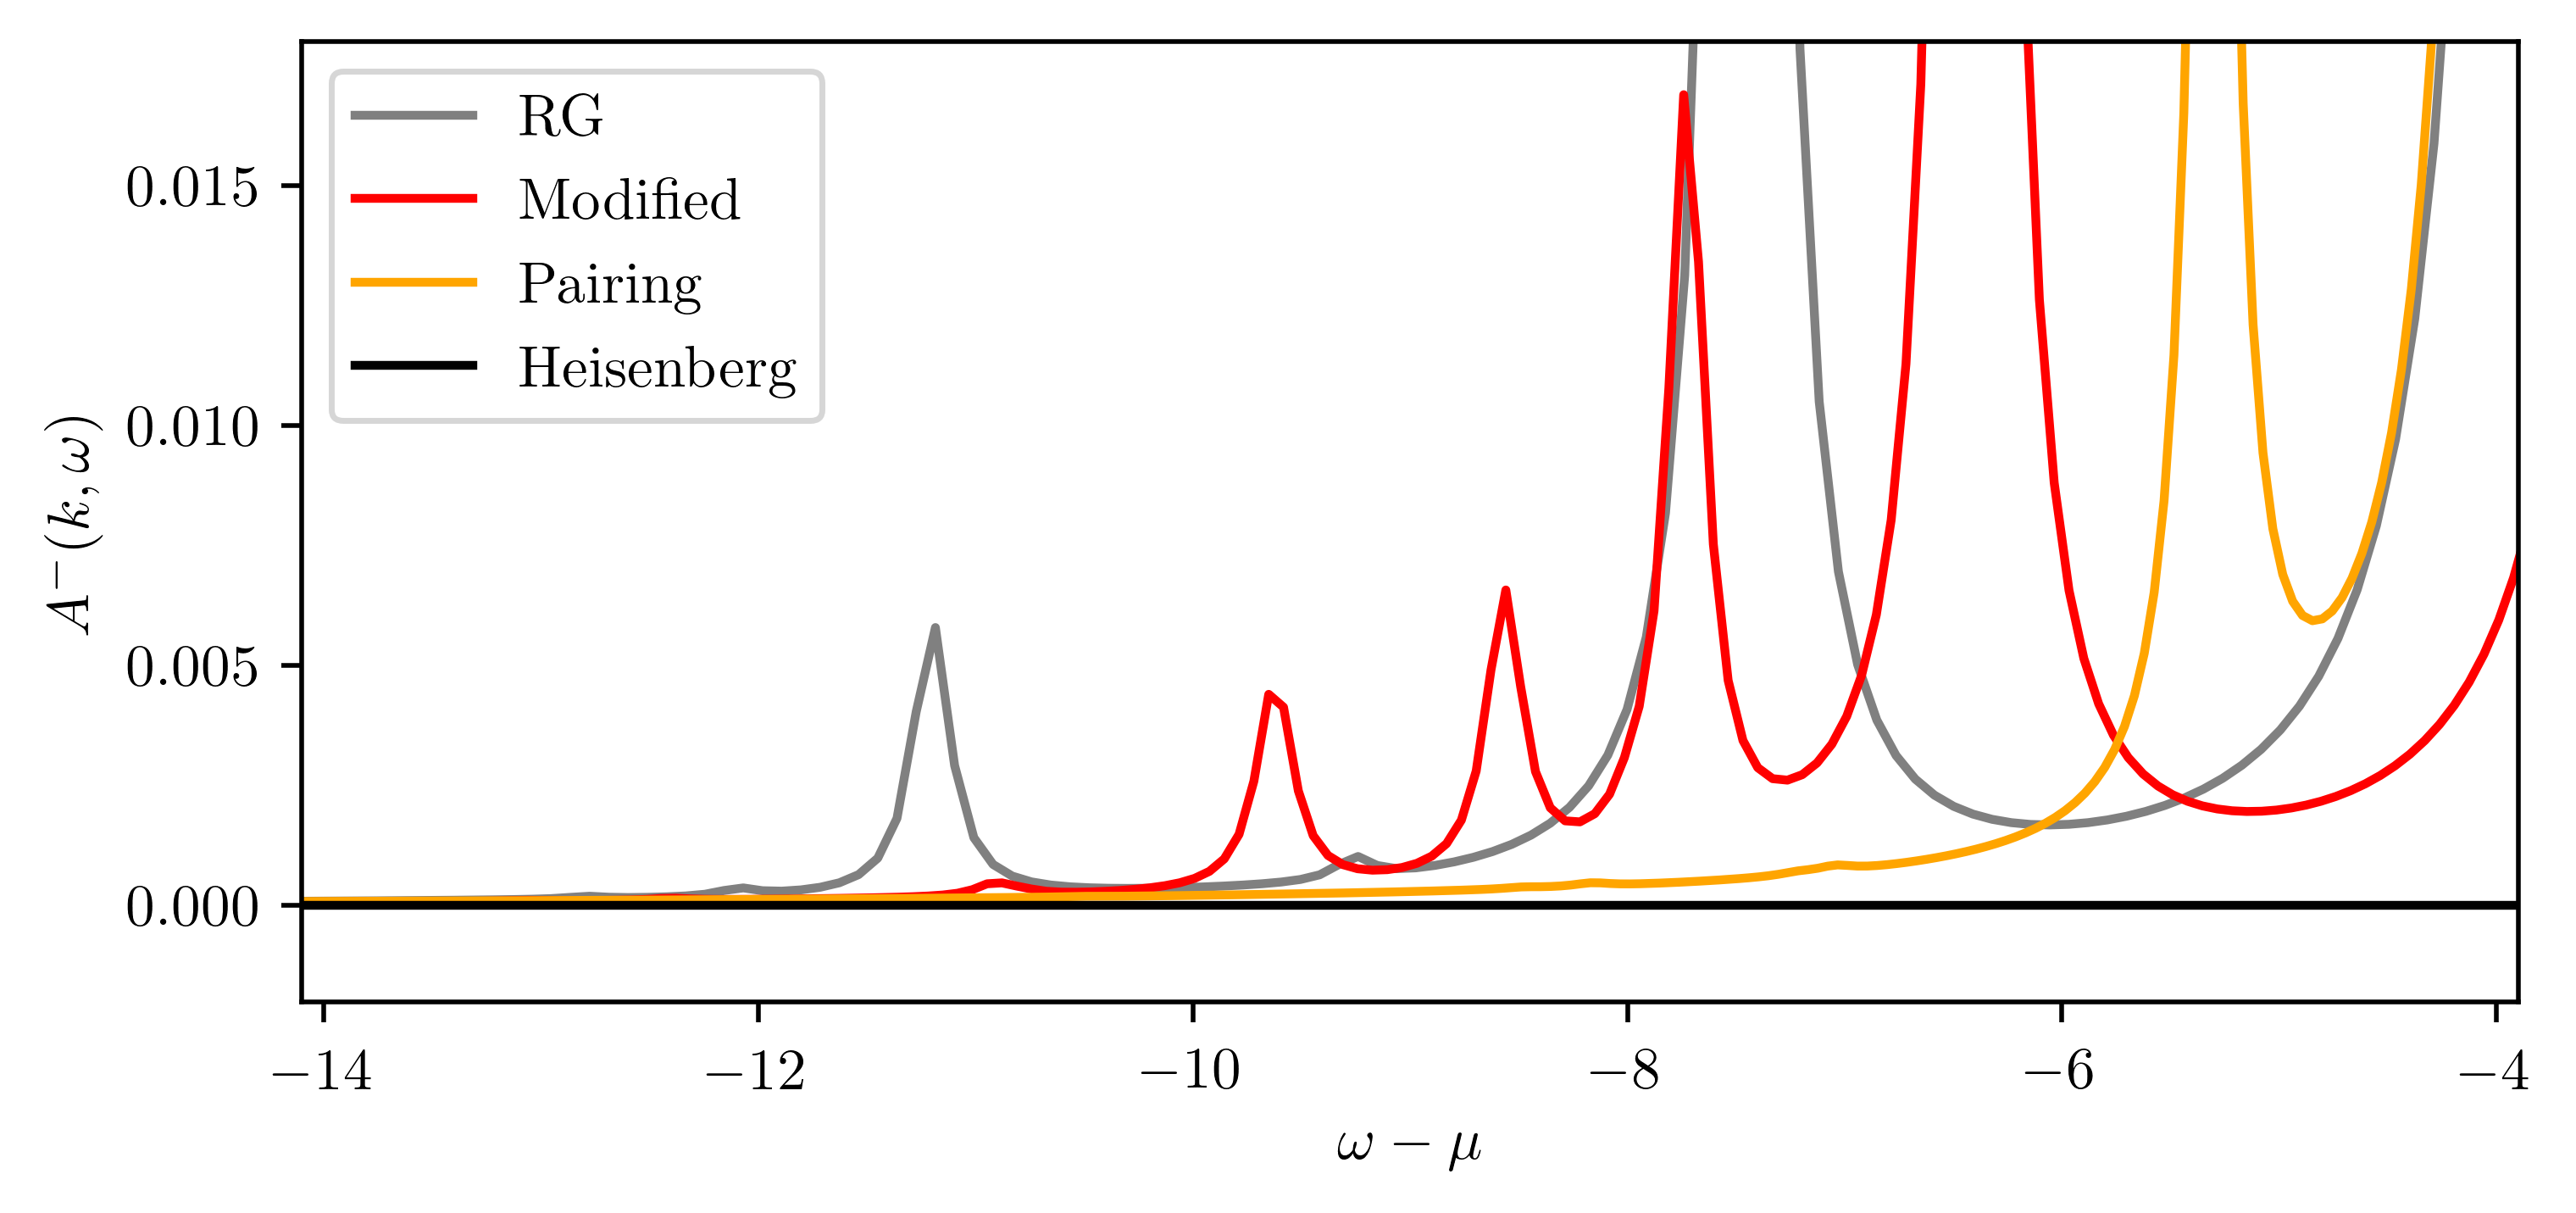

In [6]:
plt.figure(figsize=(6.75,3), dpi=500)
plt.plot(omegas_d, am_d, ls='-', color='gray', label = r'RG')
plt.plot(omegas_ns, am_ns, color='red', label='Modified')
plt.plot(omegas_pair, am_pair, color='orange', label='Pairing')
plt.plot(omegas_spin, am_spin, color='black', label='Heisenberg')

plt.xlim(-14.1, -3.9)
plt.ylim(-0.002, 0.018)
plt.yticks([0, 0.005, 0.01, 0.015])
plt.xlabel(r'$\omega-\mu$')
plt.ylabel(r'$A^-(k,\omega)$')
plt.legend()
# plt.savefig('/Users/wholdhus/Desktop/SO5_Figs/spectral_details.pdf', bbox_inches='tight')

In [8]:
L = 4
N = 4
ks = np.arange(1, 2*L+1, 2)*0.5*np.pi/L
Gs = [-1/np.sum(ks), -10/np.sum(ks), -100/np.sum(ks), -999]

steps = 1000
eta = .1
kf = L + N//4
# kf = None
order = 100

ap_mod = [None for i in range(4)]
am_mod = [None for i in range(4)]
ap_hr = [None for i in range(4)]
am_hr = [None for i in range(4)]
w_mod = [None for i in range(4)]
w_hr = [None for i in range(4)]

for i, G in enumerate(Gs):
    rescale = True
    if G == -999:
        rescale=False
    ap_mod[i], am_mod[i], w_mod[i], ns = find_spectral_fun(L, N, G, ks, steps=steps, k=kf, n_states=-999,
                                                   eta=eta, couplings=(1,1,1),
                                                   subtract_ef=True, exactly_solvable=False, rescale_H=rescale)
    ap_hr[i], am_hr[i], w_hr[i], ns = find_spectral_fun(L, N, G, ks, steps=steps, k=kf, n_states=-999,
                                                   eta=eta, couplings=(1,0,0),
                                                   subtract_ef=True, exactly_solvable=False, rescale_H=rescale)


[0.39269908 1.17809725 1.96349541 2.74889357]


 10%|█         | 157/1568 [00:00<00:00, 1569.84it/s]

Creating at 5th spot


100%|██████████| 224/224 [00:00<00:00, 1853.86it/s]


23 nonzero creation elements
9 nonzero annihilation elements
[0.39269908 1.17809725 1.96349541 2.74889357]


  9%|▉         | 146/1568 [00:00<00:00, 1457.99it/s]

Creating at 5th spot


100%|██████████| 224/224 [00:00<00:00, 2156.27it/s]


15 nonzero creation elements
3 nonzero annihilation elements
[0.39269908 1.17809725 1.96349541 2.74889357]


  9%|▉         | 146/1568 [00:00<00:00, 1459.34it/s]

Creating at 5th spot


100%|██████████| 224/224 [00:00<00:00, 2033.35it/s]


43 nonzero creation elements
12 nonzero annihilation elements
[0.39269908 1.17809725 1.96349541 2.74889357]


  9%|▉         | 141/1568 [00:00<00:01, 1407.47it/s]

Creating at 5th spot


100%|██████████| 224/224 [00:00<00:00, 1571.58it/s]


22 nonzero creation elements
4 nonzero annihilation elements
[0.39269908 1.17809725 1.96349541 2.74889357]


  9%|▉         | 143/1568 [00:00<00:01, 1409.73it/s]

Creating at 5th spot


100%|██████████| 224/224 [00:00<00:00, 1767.66it/s]


47 nonzero creation elements
12 nonzero annihilation elements
[0.39269908 1.17809725 1.96349541 2.74889357]


  9%|▉         | 146/1568 [00:00<00:00, 1455.57it/s]

Creating at 5th spot


100%|██████████| 224/224 [00:00<00:00, 1918.10it/s]


20 nonzero creation elements
5 nonzero annihilation elements
[0.39269908 1.17809725 1.96349541 2.74889357]
Zero k.e. hamiltonian
Zero k.e. hamiltonian
Zero k.e. hamiltonian


 10%|▉         | 150/1568 [00:00<00:00, 1495.35it/s]

Combined 255 degenerate states
Creating at 5th spot


100%|██████████| 224/224 [00:00<00:00, 2234.89it/s]


1555 nonzero creation elements
152 nonzero annihilation elements
[0.39269908 1.17809725 1.96349541 2.74889357]
Zero k.e. hamiltonian
Zero k.e. hamiltonian
Zero k.e. hamiltonian


  6%|▋         | 101/1568 [00:00<00:01, 1009.80it/s]

Combined 665 degenerate states
Creating at 5th spot


100%|██████████| 224/224 [00:00<00:00, 2023.62it/s]


1548 nonzero creation elements
208 nonzero annihilation elements


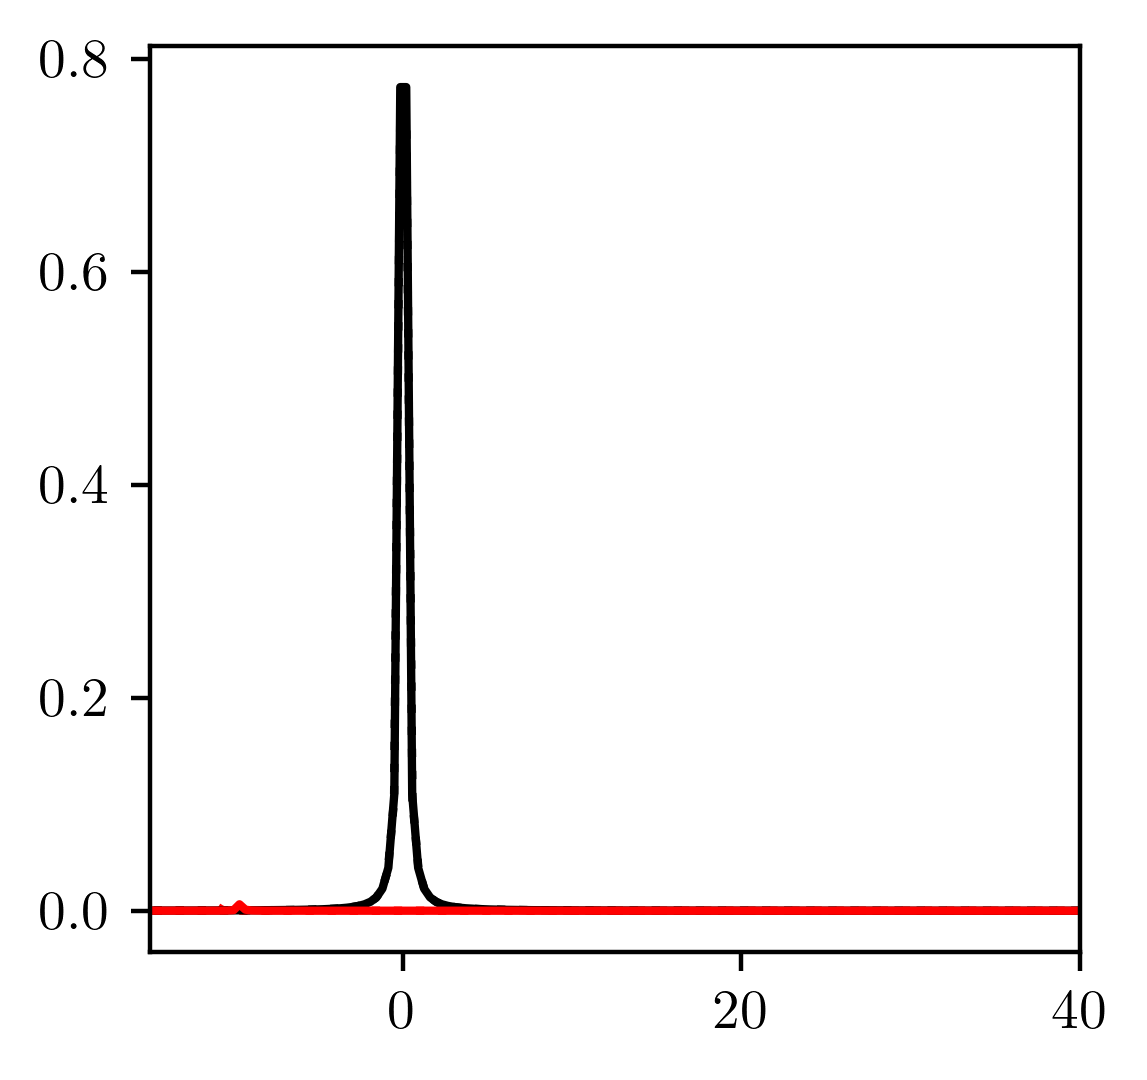

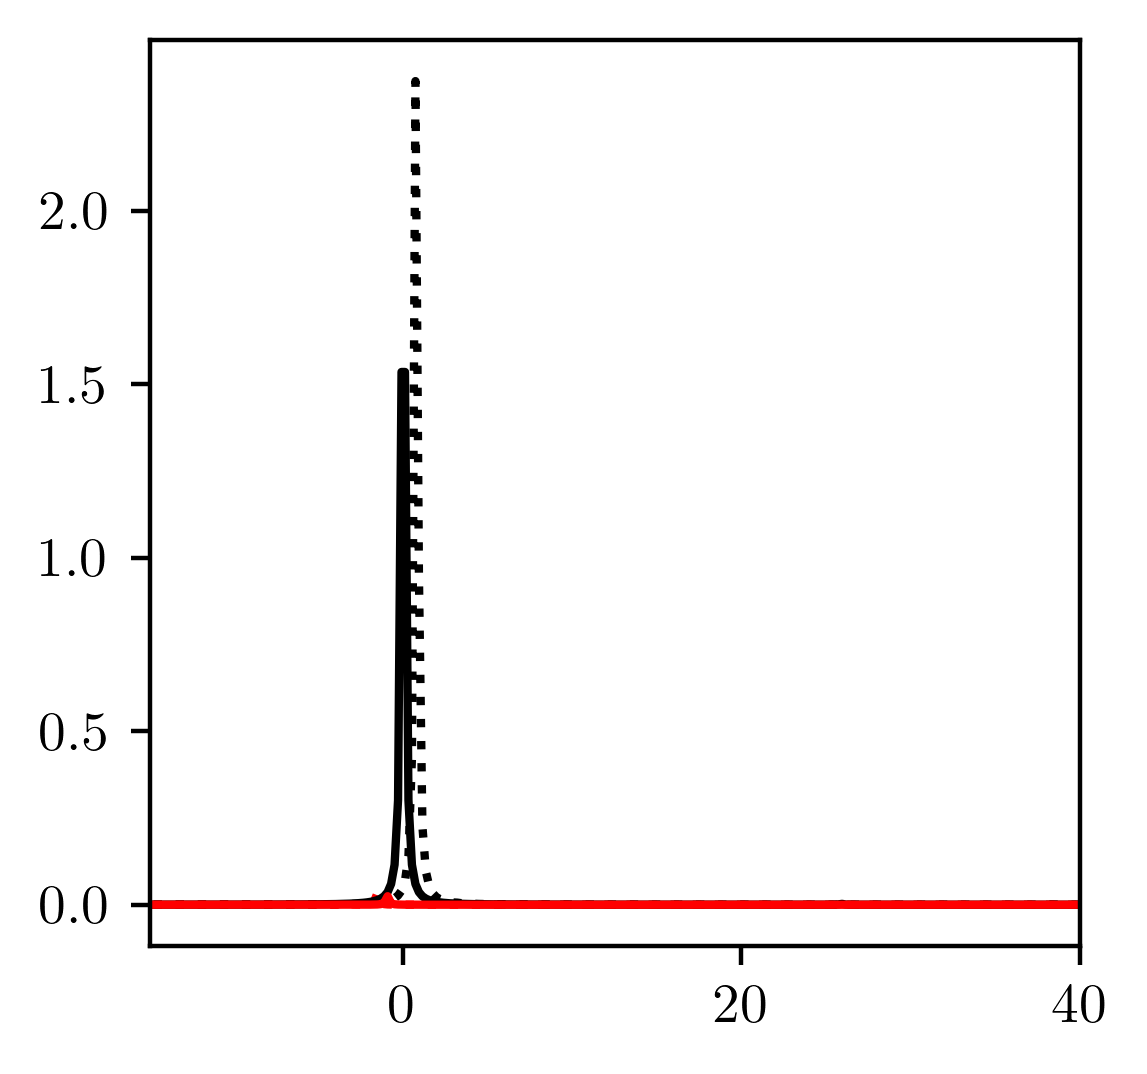

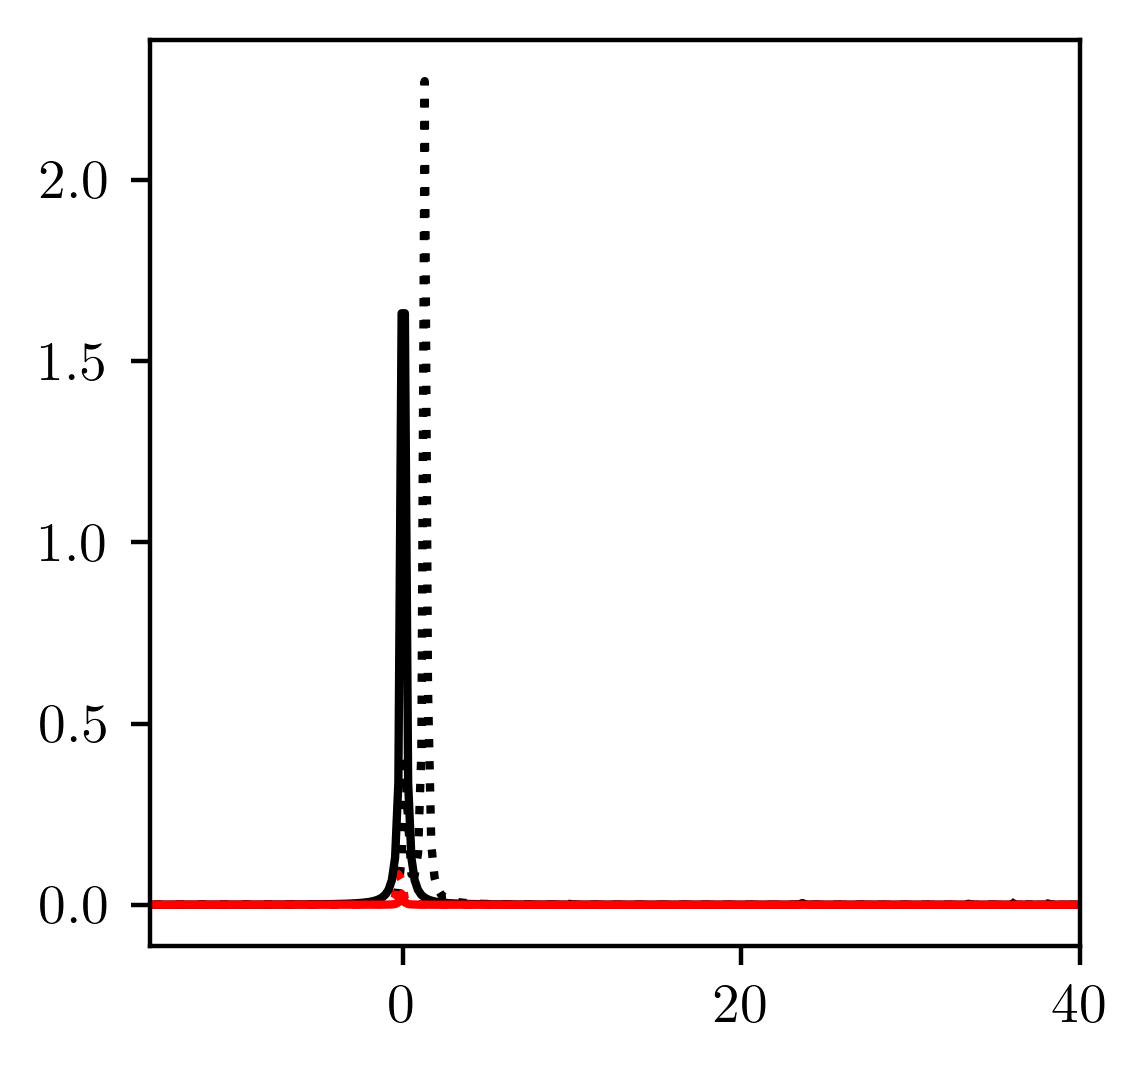

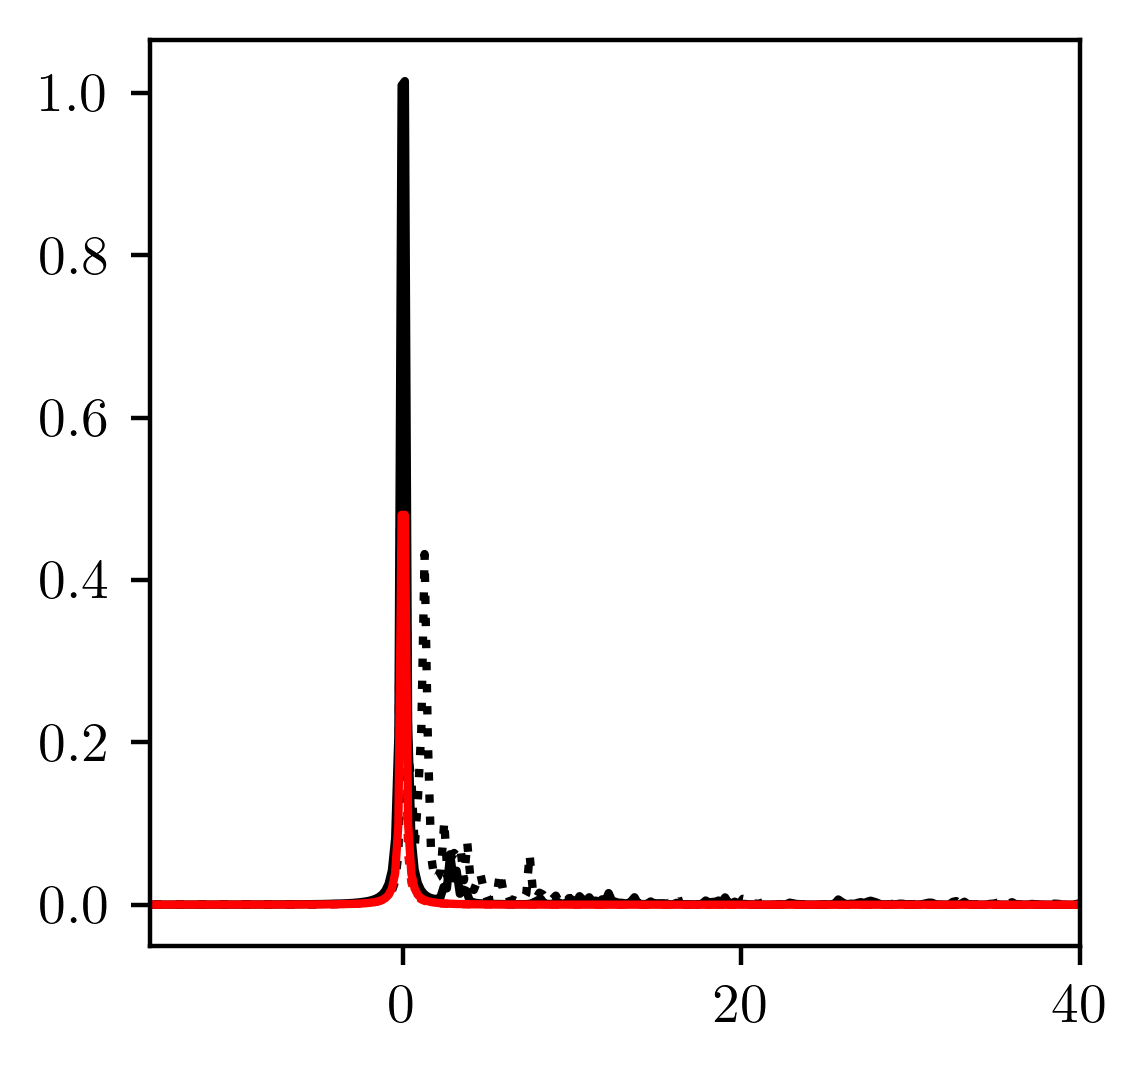

In [14]:
for i, G in enumerate(Gs):
    plt.figure(figsize=(3,3), dpi=400)
    plt.plot(w_mod[i], ap_mod[i], color='black', ls=':')
    plt.plot(w_mod[i], am_mod[i], color='red', ls=':')
    plt.plot(w_hr[i], ap_hr[i], color='black')
    plt.plot(w_hr[i], am_hr[i], color='red')
    plt.xlim(-15, 40)
    plt.show()


In [ ]:
Ls = [3, 4, 5]
aps = [None for L in Ls]
ams = [None for L in Ls]
omegas = [None for L in Ls]
states = -999
for i, L in enumerate(Ls):
    print('L = {}'.format(2*L))
    N = 3*L
    ks = np.arange(1, 2*L+1, 2)*0.5*np.pi/L
    G = -1./np.sum(ks)
    steps = 1000
    eta = .1
    kf = L + N//4
    order = 100
    couplings=(1,1,1)
    if L > 3:
        states = 100
    aps[i], ams[i], omegas[i], ns = find_spectral_fun(L, N, G, ks, steps=steps, k=kf, n_states=states,
                                                 eta=eta, couplings=couplings, subtract_ef=True)

100%|██████████| 24/24 [00:00<00:00, 2714.61it/s]

L = 4
[0.78539816 2.35619449]
Combined 3 degenerate states
Creating at 3th spot
2 nonzero creation elements
4 nonzero annihilation elements


L = 6
[0.52359878 1.57079633 2.61799388]


100%|██████████| 300/300 [00:00<00:00, 2027.26it/s]

Creating at 5th spot
3 nonzero creation elements
10 nonzero annihilation elements


L = 8
[0.39269908 1.17809725 1.96349541 2.74889357]


100%|██████████| 100/100 [00:00<00:00, 1363.44it/s]

Creating at 7th spot
6 nonzero creation elements
2 nonzero annihilation elements


L = 10
[0.31415927 0.9424778  1.57079633 2.19911486 2.82743339]
